In [1]:
import os
from glob import glob

In [2]:
#from dask.distributed import Client, progress
#client = Client(threads_per_worker=4, n_workers=20)

In [3]:
import numpy as np
import pandas as pd
#from dask import delayed
#from dask import compute

from root_pandas import read_root 
from ROOT import TFile

Welcome to JupyROOT 6.16/00


/home/jcordero/CMS/SMP_ZGamma/envSMP/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.14.3 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [4]:
'''
from guppy import hpy
h = hpy()
print(h.heap())
''';

In [5]:
import matplotlib.pyplot as plt

In [6]:
from Common.CommonHelper  import CommonHelper
from Samples.DataStack    import DataStack
from Samples.DataSample   import DataSample
from Samples.Event        import Event
from Samples.DataFile     import DataFile
from Plotter.Histo        import Histo
from Plotter.HistoSample  import HistoSample
from Plotter.HistoVar     import HistoVar

In [7]:
def getSamplesPath(path):
    return glob(os.path.join(path,"*[!.][!s][!h]"))

def getSampleFromPath(path):
    return path.split("/")[-1]

def getFileFromPath(path):
    return path.split("/")[-1]

def getFiles(path,sample):
    return glob(os.path.join(path,sample,"output*[!v_0]*"))

In [8]:
def isPathEmpty(path,samp):
    file = glob(os.path.join(path, getSampleFromPath(samp),"output*"))
    if file:
        return False
    else:
        return True

In [9]:
def SampleLoop(Sample, HStack):
    for file in Sample:
        for i,iEvent in enumerate(file):
            event = Event(iEvent)

            for histo in HStack:
                #print(histo.name)
                histo.fill( event.value(histo.name),
                            event.value('eventWeight')*Sample.getSF())
    return HStack

In [10]:
path = "/home/jcordero/CMS/data/data_2018/rereco/SMP_ZG/Files/mumug/VDask/"
chuncksize = 5000
era = "2018"

dataFiles  = ['DoubleMuon']
dataFiles += ['DoubleMuon_'+era+run for era in ['2016','2017','2018'] for run in ['A','B','C','D','E','F','G','Histo']]

In [11]:
DStack = DataStack()

for samp in getSamplesPath(path):
    if not isPathEmpty(path,samp) :
        if getSampleFromPath(samp) not in dataFiles:
            DStack.append( DataSample(path, getSampleFromPath(samp), era, chuncksize) )
    

In [12]:
def Var2PlotDict(part,var,ph):
    VarDict = []
    dirstruc = {}
    for p in part:
        for v in var:
            for gm in ph:
                VarDict.append({
                                "part":p,
                                "var":v,
                                "ph":gm
                                })
                
    return VarDict
    
def Var2Plot():
    PartVar = []
    VarDict = []
    
    parts = ["photonOne","leptonOne","leptonTwo","dilepton","llg"]
    var = ["Pt"]
    ph = [""]
    #ph = ["","_EE","_EB"]
    PartVar += [p+v+gm for p in parts for v in var for gm in ph]
    VarDict += Var2PlotDict(parts,var,ph)    
    
    parts = ["dilepton","llg"]
    var = ["M"]
    ph = [""]
    #ph = ["","_EE","_EB"]
    PartVar += [p+v+gm for p in parts for v in var for gm in ph]
    VarDict += Var2PlotDict(parts,var,ph)    
    
    parts = ["photonOne","leptonOne","leptonTwo"]
    var = ["Eta","Phi"]
    ph = [""]
    #ph = ["","_EE","_EB"]
    PartVar += [p+v+gm for p in parts for v in var for gm in ph]
    VarDict += Var2PlotDict(parts,var,ph)    
    
    parts = ["dilepton","dileptonPhoton","l1Photon","l2Photon"]
    var = ["DR","DEta","DPhi"]
    ph = [""]
    PartVar += [p+v+gm for p in parts for v in var for gm in ph]
    VarDict += Var2PlotDict(parts,var,ph)
    
    return PartVar,VarDict

In [13]:
def HVarStackckIni():
    HVarStack = HistoVar()
    _,vardict = Var2Plot()
    
    for var in vardict:
        #print(var)
        HVarStack.append(Histo(variable = var))
        
    return HVarStack

In [14]:

HSampleStack = HistoSample()
for sample in DStack.getSamples():
    print(sample)
    HSampleStack.append(SampleLoop(DStack[sample], HVarStackckIni()),name = sample)
    #HSampleStack.append(delayed(SampleLoop)(DStack[sample], HVarStack))
#compute(*HSampleStack)

WZTo2L2Q
DYJets
ZZTo4L
ZGToLLG
TTTo2L2Nu
WZTo3LNu
WJets


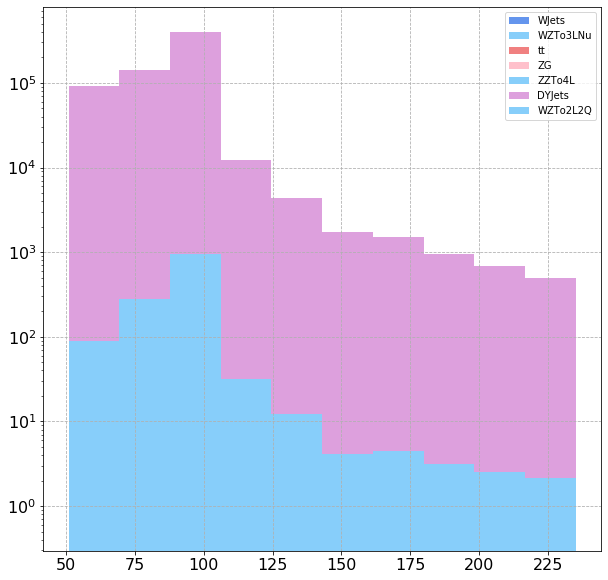

In [15]:
fig,ax = HSampleStack.plot(variable="dileptonM",log=True)
#HSampleStack.plot(log=True)
#HSampleStack.plot(log=False)

In [16]:
VV = ['WZTo2L2Q','ZZTo4L','WZTo3LNu']
HSampleStack.merge(VV,name ="VV")

['photonOnePt', 'leptonOnePt', 'leptonTwoPt', 'dileptonPt', 'llgPt', 'dileptonM', 'llgM', 'photonOneEta', 'photonOnePhi', 'leptonOneEta', 'leptonOnePhi', 'leptonTwoEta', 'leptonTwoPhi', 'dileptonDR', 'dileptonDEta', 'dileptonDPhi', 'dileptonPhotonDR', 'dileptonPhotonDEta', 'dileptonPhotonDPhi', 'l1PhotonDR', 'l1PhotonDEta', 'l1PhotonDPhi', 'l2PhotonDR', 'l2PhotonDEta', 'l2PhotonDPhi']   ['photonOnePt', 'leptonOnePt', 'leptonTwoPt', 'dileptonPt', 'llgPt', 'dileptonM', 'llgM', 'photonOneEta', 'photonOnePhi', 'leptonOneEta', 'leptonOnePhi', 'leptonTwoEta', 'leptonTwoPhi', 'dileptonDR', 'dileptonDEta', 'dileptonDPhi', 'dileptonPhotonDR', 'dileptonPhotonDEta', 'dileptonPhotonDPhi', 'l1PhotonDR', 'l1PhotonDEta', 'l1PhotonDPhi', 'l2PhotonDR', 'l2PhotonDEta', 'l2PhotonDPhi']
['photonOnePt', 'leptonOnePt', 'leptonTwoPt', 'dileptonPt', 'llgPt', 'dileptonM', 'llgM', 'photonOneEta', 'photonOnePhi', 'leptonOneEta', 'leptonOnePhi', 'leptonTwoEta', 'leptonTwoPhi', 'dileptonDR', 'dileptonDEta', 'dilep

In [17]:
np.array(HSampleStack.name)

array(['DYJets', 'ZGToLLG', 'TTTo2L2Nu', 'WJets', 'VV'], dtype='<U9')

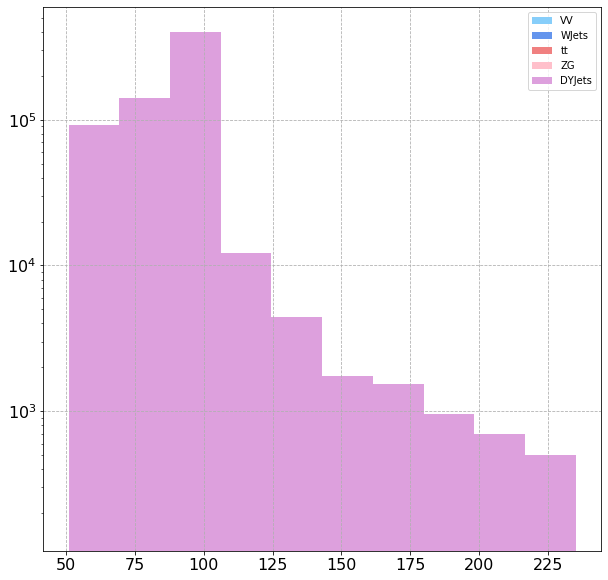

In [18]:
SS = HSampleStack.plot(variable="dileptonM",log=True,Debug=True)
#HSampleStack.plot(variable="dileptonM",log=False)

['WJets', 'TTTo2L2Nu', 'ZGToLLG', 'VV', 'DYJets']


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb7cb87dc88>)

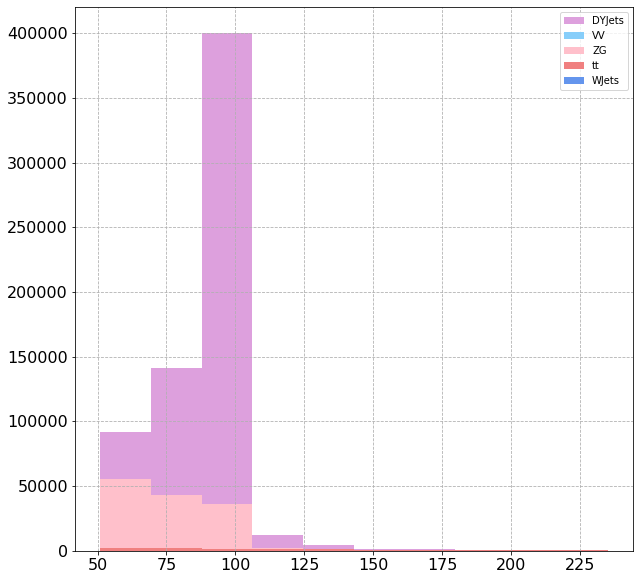

In [39]:
print(HSampleStack.name)
#SS = HSampleStack.plot(variable="photonOnePt",log=True,Debug=True)
HSampleStack.plot(variable="dileptonM",log=False)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb7d066af98>)

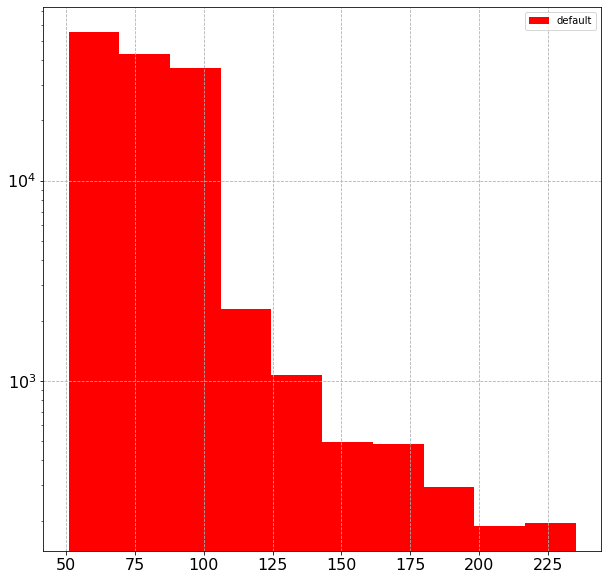

In [21]:
HSampleStack['ZGToLLG'].plot(variable='dileptonM',log=True)

In [22]:
#np.sum(HSampleStack[smp] for smp in HSampleStack.name)
for hsmpstck in HSampleStack:
    hsmpstck.Print = True

In [23]:
HSampleStack['DYJets'].Print

True

In [24]:
#M['photonOnePt'].values
#M['photonOnePt'].plot()

In [25]:
M = HSampleStack['DYJets']+HSampleStack['ZGToLLG']

['photonOnePt', 'leptonOnePt', 'leptonTwoPt', 'dileptonPt', 'llgPt', 'dileptonM', 'llgM', 'photonOneEta', 'photonOnePhi', 'leptonOneEta', 'leptonOnePhi', 'leptonTwoEta', 'leptonTwoPhi', 'dileptonDR', 'dileptonDEta', 'dileptonDPhi', 'dileptonPhotonDR', 'dileptonPhotonDEta', 'dileptonPhotonDPhi', 'l1PhotonDR', 'l1PhotonDEta', 'l1PhotonDPhi', 'l2PhotonDR', 'l2PhotonDEta', 'l2PhotonDPhi']   ['photonOnePt', 'leptonOnePt', 'leptonTwoPt', 'dileptonPt', 'llgPt', 'dileptonM', 'llgM', 'photonOneEta', 'photonOnePhi', 'leptonOneEta', 'leptonOnePhi', 'leptonTwoEta', 'leptonTwoPhi', 'dileptonDR', 'dileptonDEta', 'dileptonDPhi', 'dileptonPhotonDR', 'dileptonPhotonDEta', 'dileptonPhotonDPhi', 'l1PhotonDR', 'l1PhotonDEta', 'l1PhotonDPhi', 'l2PhotonDR', 'l2PhotonDEta', 'l2PhotonDPhi']


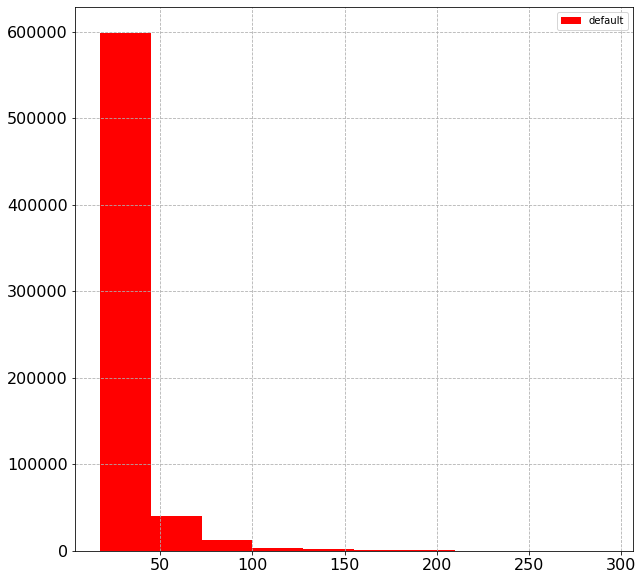

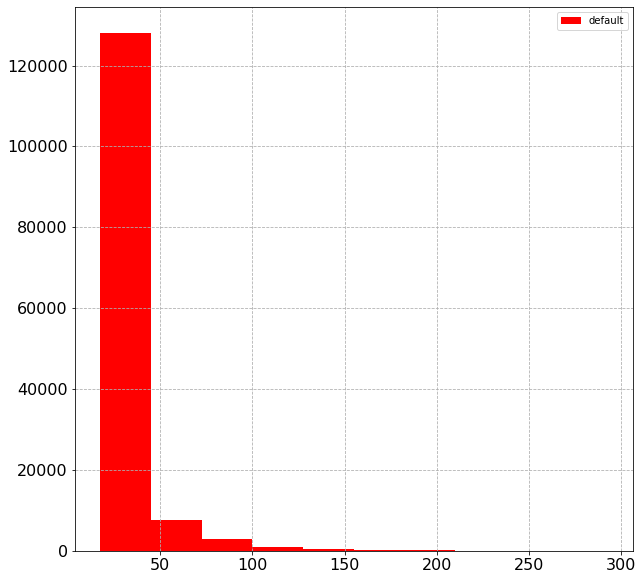

In [26]:
HSampleStack['DYJets']['photonOnePt'].plot()
HSampleStack['ZGToLLG']['photonOnePt'].plot()

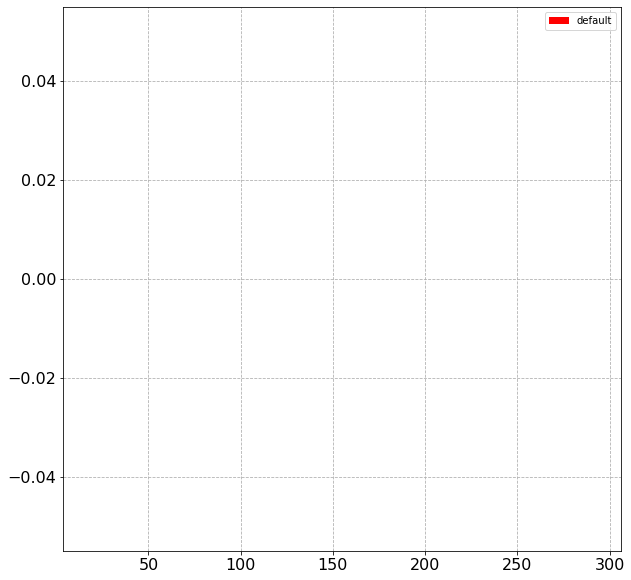

In [27]:
M['photonOnePt'].plot()
#M['photonOnePt'].values
#HSampleStack['DYJets']['photonOnePt']+HSampleStack['ZGToLLG']['photonOnePt']

In [28]:
print(HSampleStack['DYJets']['photonOnePt'].values,
      HSampleStack['ZGToLLG']['photonOnePt'].values)

[278356.56591796875, 142186.61743164062, 80553.7822265625, 48580.04138183594, 29422.047821044922, 19412.670837402344, 13395.862808227539, 10198.548049926758, 7253.0996017456055, 5403.194862365723, 4229.129089355469, 3382.2089462280273, 2475.3914737701416, 1948.3294639587402, 1844.8262481689453, 1303.948510169983, 1081.8763914108276, 945.6933040618896, 742.650648355484, 586.1157684326172, 522.8583831787109, 389.8989169597626, 323.36119556427, 344.9063571691513, 266.51184487342834, 228.13508117198944, 209.2820372581482, 199.94005912542343, 126.46655738353729, 115.71269565820694, 112.35818564891815, 126.4213136434555, 122.86067247390747, 86.11922645568848, 99.61506843566895, 73.2324498295784, 40.744712352752686, 39.166794776916504, 46.78330248594284, 51.86359620094299, 38.38032627105713, 23.556986093521118, 21.403096795082092, 11.4930100440979, 18.4225172996521, 19.76061725616455, 23.93474382162094, 36.779852509498596, 18.33089280128479, 13.106838464736938, 6.8854687213897705, 1.891835808

In [29]:
(HSampleStack['DYJets']['photonOnePt'] + HSampleStack['ZGToLLG']['photonOnePt']).values

[339154.39794921875,
 174124.61694335938,
 97613.5737915039,
 57700.889251708984,
 34937.55827331543,
 23025.536430358887,
 15883.76725769043,
 12066.284481048584,
 8577.893711090088,
 6488.881858825684,
 5139.173723220825,
 4134.789844512939,
 3049.340151786804,
 2441.4246921539307,
 2263.2575845718384,
 1616.167739868164,
 1346.4052743911743,
 1197.8195009231567,
 957.8948767185211,
 763.3360593318939,
 706.1489462852478,
 499.39757293462753,
 431.36359572410583,
 445.68278527259827,
 368.9820671081543,
 313.12227296829224,
 279.26523688435555,
 254.16547340154648,
 182.59587013721466,
 148.54227322340012,
 147.3428055047989,
 181.97233498096466,
 150.99648141860962,
 111.62876337766647,
 147.61619490385056,
 84.05403137207031,
 63.80877363681793,
 58.4809775352478,
 56.87137669324875,
 68.7299702167511,
 47.07346725463867,
 43.735657930374146,
 27.684202075004578,
 27.36852753162384,
 29.52158296108246,
 26.475556254386902,
 30.059057533740997,
 45.4813791513443,
 25.948827624320984

In [30]:
HSampleStack[[0,3]]

[Stack([Histo(bins=[15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0, 160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0, 200.0, 205.0, 210.0, 215.0, 220.0, 225.0, 230.0, 235.0, 240.0, 245.0, 250.0, 255.0, 260.0, 265.0, 270.0, 275.0, 280.0, 285.0, 290.0, 295.0],
       nbins=None,
       ranges=[15.0, 140.0]), Histo(bins=[20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0, 82.0, 84.0, 86.0, 88.0, 90.0, 92.0, 94.0, 96.0, 98.0, 100.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0, 124.0, 126.0, 128.0, 130.0, 132.0, 134.0, 136.0, 138.0],
       nbins=None,
       ranges=[25.0, 140.0]), Histo(bins=[20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0

In [31]:
HSampleStack.getProperties()

{'color': ['cornflowerblue', 'lightcoral', 'pink', 'lightskyblue', 'plum'],
 'label': ['WJets', 'tt', 'ZG', 'VV', 'DYJets'],
 'histtype': 'stepfilled'}

In [32]:
for idy, izg in zip(HSampleStack['DYJets'],HSampleStack['ZGToLLG']):
    print((idy + izg).values)
    m = (idy + izg)
    print(m.values)
    print()

[339154.39794921875, 174124.61694335938, 97613.5737915039, 57700.889251708984, 34937.55827331543, 23025.536430358887, 15883.76725769043, 12066.284481048584, 8577.893711090088, 6488.881858825684, 5139.173723220825, 4134.789844512939, 3049.340151786804, 2441.4246921539307, 2263.2575845718384, 1616.167739868164, 1346.4052743911743, 1197.8195009231567, 957.8948767185211, 763.3360593318939, 706.1489462852478, 499.39757293462753, 431.36359572410583, 445.68278527259827, 368.9820671081543, 313.12227296829224, 279.26523688435555, 254.16547340154648, 182.59587013721466, 148.54227322340012, 147.3428055047989, 181.97233498096466, 150.99648141860962, 111.62876337766647, 147.61619490385056, 84.05403137207031, 63.80877363681793, 58.4809775352478, 56.87137669324875, 68.7299702167511, 47.07346725463867, 43.735657930374146, 27.684202075004578, 27.36852753162384, 29.52158296108246, 26.475556254386902, 30.059057533740997, 45.4813791513443, 25.948827624320984, 18.838524222373962, 23.07504940032959, 7.73246

In [33]:
type(HSampleStack['DYJets']+HSampleStack['ZGToLLG'])

['photonOnePt', 'leptonOnePt', 'leptonTwoPt', 'dileptonPt', 'llgPt', 'dileptonM', 'llgM', 'photonOneEta', 'photonOnePhi', 'leptonOneEta', 'leptonOnePhi', 'leptonTwoEta', 'leptonTwoPhi', 'dileptonDR', 'dileptonDEta', 'dileptonDPhi', 'dileptonPhotonDR', 'dileptonPhotonDEta', 'dileptonPhotonDPhi', 'l1PhotonDR', 'l1PhotonDEta', 'l1PhotonDPhi', 'l2PhotonDR', 'l2PhotonDEta', 'l2PhotonDPhi']   ['photonOnePt', 'leptonOnePt', 'leptonTwoPt', 'dileptonPt', 'llgPt', 'dileptonM', 'llgM', 'photonOneEta', 'photonOnePhi', 'leptonOneEta', 'leptonOnePhi', 'leptonTwoEta', 'leptonTwoPhi', 'dileptonDR', 'dileptonDEta', 'dileptonDPhi', 'dileptonPhotonDR', 'dileptonPhotonDEta', 'dileptonPhotonDPhi', 'l1PhotonDR', 'l1PhotonDEta', 'l1PhotonDPhi', 'l2PhotonDR', 'l2PhotonDEta', 'l2PhotonDPhi']


Plotter.HistoVar.HistoVar

In [34]:
for d in HSampleStack['DYJets']:
    print(type(d))

<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>
<class 'Plotter.Histo.Histo'>


In [35]:
['photonOnePt', 'leptonOnePt', 'leptonTwoPt', 'dileptonPt', 'llgPt', 'dileptonM', 'llgM', 'photonOneEta', 'photonOnePhi', 'leptonOneEta', 'leptonOnePhi', 'leptonTwoEta', 'leptonTwoPhi', 'dileptonDR', 'dileptonDEta', 'dileptonDPhi', 'dileptonPhotonDR', 'dileptonPhotonDEta', 'dileptonPhotonDPhi', 'l1PhotonDR', 'l1PhotonDEta', 'l1PhotonDPhi', 'l2PhotonDR', 'l2PhotonDEta', 'l2PhotonDPhi', 'photonOnePt', 'leptonOnePt', 'leptonTwoPt', 'dileptonPt', 'llgPt', 'dileptonM', 'llgM', 'photonOneEta', 'photonOnePhi', 'leptonOneEta', 'leptonOnePhi', 'leptonTwoEta', 'leptonTwoPhi', 'dileptonDR', 'dileptonDEta', 'dileptonDPhi', 'dileptonPhotonDR', 'dileptonPhotonDEta', 'dileptonPhotonDPhi', 'l1PhotonDR', 'l1PhotonDEta', 'l1PhotonDPhi', 'l2PhotonDR', 'l2PhotonDEta', 'l2PhotonDPhi', 'photonOnePt', 'leptonOnePt', 'leptonTwoPt', 'dileptonPt', 'llgPt', 'dileptonM', 'llgM', 'photonOneEta', 'photonOnePhi', 'leptonOneEta', 'leptonOnePhi', 'leptonTwoEta', 'leptonTwoPhi', 'dileptonDR', 'dileptonDEta', 'dileptonDPhi', 'dileptonPhotonDR', 'dileptonPhotonDEta', 'dileptonPhotonDPhi', 'l1PhotonDR', 'l1PhotonDEta', 'l1PhotonDPhi', 'l2PhotonDR', 'l2PhotonDEta', 'l2PhotonDPhi']

['photonOnePt',
 'leptonOnePt',
 'leptonTwoPt',
 'dileptonPt',
 'llgPt',
 'dileptonM',
 'llgM',
 'photonOneEta',
 'photonOnePhi',
 'leptonOneEta',
 'leptonOnePhi',
 'leptonTwoEta',
 'leptonTwoPhi',
 'dileptonDR',
 'dileptonDEta',
 'dileptonDPhi',
 'dileptonPhotonDR',
 'dileptonPhotonDEta',
 'dileptonPhotonDPhi',
 'l1PhotonDR',
 'l1PhotonDEta',
 'l1PhotonDPhi',
 'l2PhotonDR',
 'l2PhotonDEta',
 'l2PhotonDPhi',
 'photonOnePt',
 'leptonOnePt',
 'leptonTwoPt',
 'dileptonPt',
 'llgPt',
 'dileptonM',
 'llgM',
 'photonOneEta',
 'photonOnePhi',
 'leptonOneEta',
 'leptonOnePhi',
 'leptonTwoEta',
 'leptonTwoPhi',
 'dileptonDR',
 'dileptonDEta',
 'dileptonDPhi',
 'dileptonPhotonDR',
 'dileptonPhotonDEta',
 'dileptonPhotonDPhi',
 'l1PhotonDR',
 'l1PhotonDEta',
 'l1PhotonDPhi',
 'l2PhotonDR',
 'l2PhotonDEta',
 'l2PhotonDPhi',
 'photonOnePt',
 'leptonOnePt',
 'leptonTwoPt',
 'dileptonPt',
 'llgPt',
 'dileptonM',
 'llgM',
 'photonOneEta',
 'photonOnePhi',
 'leptonOneEta',
 'leptonOnePhi',
 'leptonTwoE